## **User Behavior Analysis & Churn Prediction in Television Service Usage**

## ***Introduction*** 

The dataset describes the HD TV service usage history of users who have canceled their HD TV subscription.

This project focuses on analyzing historical usage data of these users to gain insights and build a predictive churn model.

### Dataset

* user_info

|       Column       |      Description        |
| :------------:|:-------------:|
|    MAC        |      User ID     |
|    # of days        |      Number of register days     |

* log:

|       Column       |      Description        |
| :------------:|:-------------:|
|    MAC        |      User ID     |
|     SessionMainMenu        |      Timestamp when the user started using the service     |
|     AppName         | Application used by the user    |
|    LogID        |Log identifier   |
|     Event        |       User interaction or action performed     |
|     ItemID         | Identifier of the content being watched         |
|    RealTimePlaying        |     Actual viewing duration (second)     |

## ***Exploring Data***

In [1]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import numpy as np
import os
import ast # For parsing strings as tuples
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# View list of data containing log
traffic_path = "raw_data\\log\\"
list_file = os.listdir(traffic_path)
list_file

['logt21.txt',
 'logt22.txt',
 'logt23.txt',
 'logt24.txt',
 'logt25.txt',
 'logt31.txt',
 'logt32.txt']

In [3]:
# Import list of ".txt" file for the log dataset
records =[]
df = pd.DataFrame()
for i in list_file:
    with open(traffic_path + i) as file:
        data = file.readlines()
        print('Processed file {}'.format(i))
    for line in data:
        parse_tuple = ast.literal_eval(line)
        records.append(parse_tuple)
    df_1 = pd.DataFrame(records)
    df = pd.concat([df, df_1])

Processed file logt21.txt
Processed file logt22.txt
Processed file logt23.txt
Processed file logt24.txt
Processed file logt25.txt
Processed file logt31.txt
Processed file logt32.txt


In [4]:
print(df.columns)
print(df.shape)

Index(['ItemId', 'RealTimePlaying', 'Firmware', 'DefaultGetway', 'SubMenuId',
       'Folder', 'ItemName', 'AppName', 'ElapsedTimePlaying', 'Screen',
       'SecondaryDNS', 'LogId', 'Mac', 'LocalType', 'SubnetMask', 'ip_wan',
       'CustomerID', 'Url', 'ListOnFolder', 'Contract', 'Directors',
       'SessionMainMenu', 'PrimaryDNS', 'ChapterID', 'Ip', 'BoxTime',
       'PublishCountry', 'Session', 'SessionSubMenu', 'AppId', 'Duration',
       'Event', 'DateStamp', 'isLandingPage', 'Key', 'Multicast', 'Title',
       'IsPersonal', 'IDRelated', 'keyword', 'Original', 'Hit', 'Path'],
      dtype='object')
(2806916, 43)


In [5]:
# Get the necessary columns from the data for processing
log = df[['Mac', 'SessionMainMenu', 'AppName', 'LogId', 'Event', 'ItemId', 'RealTimePlaying']]
log.rename(columns= {'Mac':'MAC'}, inplace=True)
log.head(5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3424\53349716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log.rename(columns= {'Mac':'MAC'}, inplace=True)


,MAC,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying
0,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,570.3
1,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:01:56:838,IPTV,40,EnterIPTV,NaN,NaN
2,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:02:29:258,VOD,55,NextVOD,100052388,NaN
3,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,18,ChangeModule,NaN,NaN
4,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,54,PlayVOD,100052388,NaN


In [6]:
#  Import ".txt" file for the user info dataset and fix ID user column
user_info = pd.read_csv("raw_data\\user_info.txt", delimiter= "\t")
user_info['MAC'] = user_info["MAC"].str[4:]
user_info.rename(columns= {'# of days' : 'NumOfDays'}, inplace = True)
user_info.head(5)

,MAC,NumOfDays
0,B046FCB79E0B,20
1,B046FCB3528B,181
2,B046FCAAFB73,426
3,B046FCAAFB72,426
4,B046FCAA2085,429


In [7]:
# Check for missing values and handle them if necessary
print("Missing value in log data: ")
print(log.isnull().sum())
print("Missing value in user info data: ")
print(user_info.isnull().sum())

Missing value in log data: 
MAC                      0
SessionMainMenu         82
AppName                  0
LogId                    0
Event                    0
ItemId              463139
RealTimePlaying    1890296
dtype: int64
Missing value in user info data: 
MAC          0
NumOfDays    0
dtype: int64


##### ***Analyze user behavior and usage characteristics***

In [8]:
data = log.merge(user_info, on='MAC', how='outer')
data.dropna(subset=['SessionMainMenu'], inplace=True)
data['ItemId'] = data['ItemId'].fillna('Unknow')
data['RealTimePlaying'] = data['RealTimePlaying'].fillna(0)
data['RealTimePlaying'] = data['RealTimePlaying'].astype(float)
data['TimePlayingHour'] = data['RealTimePlaying']/360
data['SessionDate'] = pd.to_datetime(data['SessionMainMenu'].str[13:23], format='%Y:%m:%d')

data.head()

,MAC,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying,NumOfDays,TimePlayingHour,SessionDate
165,B046FCA69EA6,B046FCA69EA6:2016:02:05:17:54:13:946,IPTV,41,StartChannel,149,0.000,629,0.000000,2016-02-05
166,B046FCA69EA6,B046FCA69EA6:2016:02:05:17:54:13:946,IPTV,42,StopChannel,147,5069.461,629,14.081836,2016-02-05
167,B046FCA69EA6,B046FCA69EA6:2016:02:05:17:54:13:946,IPTV,41,StartChannel,148,0.000,629,0.000000,2016-02-05
168,B046FCA69EA6,B046FCA69EA6:2016:02:10:22:46:00:150,IPTV,41,StartChannel,3,0.000,629,0.000000,2016-02-10
169,B046FCA69EA6,B046FCA69EA6:2016:02:10:22:46:00:150,IPTV,42,StopChannel,181,7.631,629,0.021197,2016-02-10


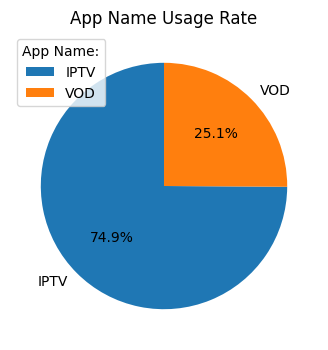

In [9]:
app_dist = data['AppName'].value_counts(normalize=True).to_frame().reset_index()
app_dist.columns = ['AppName', 'Proportion']

plt.figure(figsize=(4,4))
plt.pie(app_dist['Proportion'], labels= app_dist['AppName'], autopct='%1.1f%%',startangle = 90)
plt.legend(title="App Name:")
plt.title('App Name Usage Rate')
plt.show()

***IPTV is significantly more popular than VOD***

IPTV accounts for approximately 74.9% of total usage, while VOD only makes up 25.1%.

This indicates that most users prefer using the traditional live broadcast service (IPTV) over on-demand content (VOD).

Users may still stick to the habit of watching TV based on scheduled programming. This suggests that live broadcast remains a core value in user behavior, especially among long-term or older users.

The next step should be to investigate why users are not choosing VOD, such as interface issues, lack of attractive content, slow load times, etc.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3424\4245424424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[0], data = data, x="AppName", palette = 'Blues', order=order)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3424\4245424424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x=time_playing_dist['AppName'], y=time_playing_dist['TimePlayingHour'], palette = 'Blues', order=order)


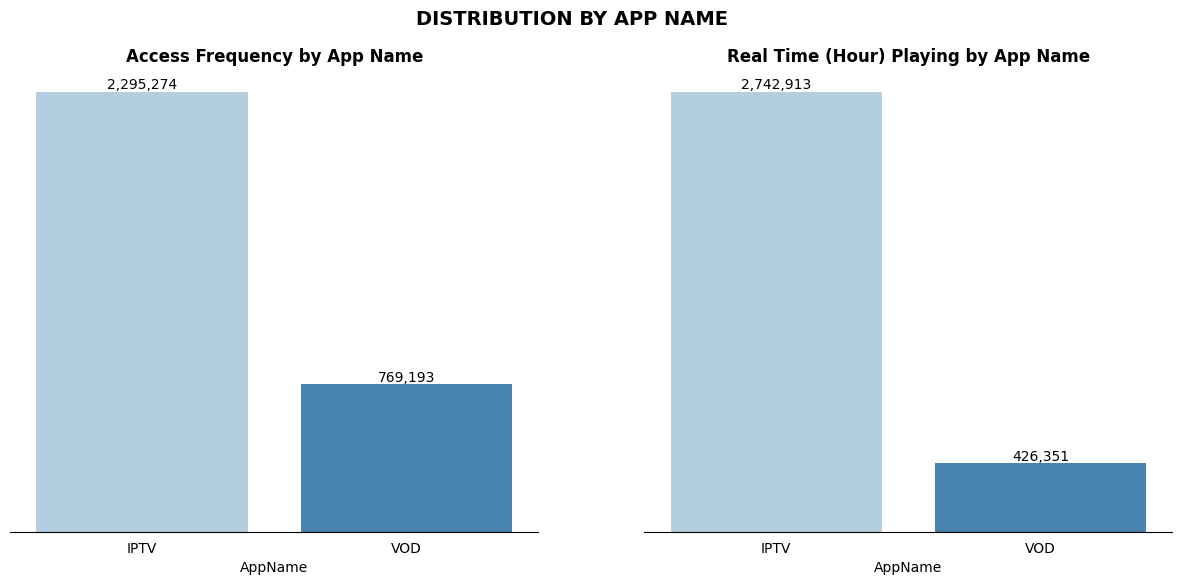

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
order = sorted(data['AppName'].unique())

# Plot Access Frequency:
sns.countplot(ax=axs[0], data = data, x="AppName", palette = 'Blues', order=order)
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='{:,.0f}'.format)
axs[0].get_yaxis().set_visible(False) #remove value y column
spines = ['top', 'right','left']
for s in spines:
    axs[0].spines[s].set_visible(False)
axs[0].tick_params(left = False, bottom = False)
axs[0].set_title("Access Frequency by App Name", fontweight = 'bold', size = 12)

# Plot Hour Playing by App Name
time_playing_dist = data.groupby('AppName')['TimePlayingHour'].sum().to_frame().reset_index()

sns.barplot(ax=axs[1], x=time_playing_dist['AppName'], y=time_playing_dist['TimePlayingHour'], palette = 'Blues', order=order)
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='{:,.0f}'.format)
axs[1].get_yaxis().set_visible(False) #remove value y column
spines = ['top', 'right','left']
for s in spines:
    axs[1].spines[s].set_visible(False)
axs[1].tick_params(left = False, bottom = False)
axs[1].set_title("Real Time (Hour) Playing by App Name", fontweight = 'bold', size = 12)

plt.suptitle("DISTRIBUTION BY APP NAME", fontweight = 'bold', size = 14)
plt.show()

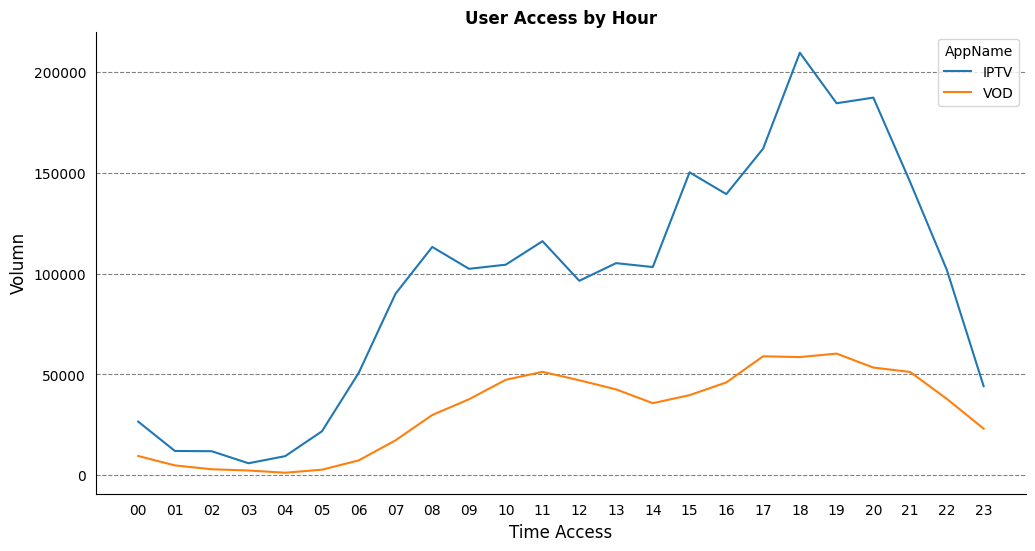

In [11]:
time_access = data[['SessionMainMenu','AppName', 'MAC']].copy()
time_access['Hour'] = data['SessionMainMenu'].str[24:26]
time_access = time_access.groupby(['Hour', 'AppName'])['MAC'].count().reset_index().sort_values(by='Hour', ascending=True)
time_access = time_access[time_access['Hour'] != ""]

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = time_access, x='Hour', y='MAC', hue='AppName')
ax.yaxis.grid(color = 'gray', linestyle = 'dashed')
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)
ax.tick_params(left = False, bottom = False)
plt.xlabel('Time Access',size = 12)
plt.ylabel('Volumn',size = 12)
plt.title('User Access by Hour', fontweight = 'bold', size = 12)
plt.show()

##### ***Summary user behavior***

In [12]:
usage_summary = data.groupby('MAC').agg(
    NumOfSession = ('LogId', 'nunique'),
    NumOfAppPerMac = ('AppName', 'nunique'),
    TotalPlayingTimeHour = ('TimePlayingHour', 'sum'),
    AverageViewingTime = ('TimePlayingHour', 'mean'),
    DaysRegistered = ('NumOfDays', 'first')
    # LastActiveDate = ('SessionDate', 'max')
).reset_index()
# usage_summary['InactiveDays'] = (usage_summary['LastActiveDate'].max() + pd.Timedelta(days=1) - usage_summary['LastActiveDate']).dt.days.astype(int)
usage_summary['WatchFrequency'] = usage_summary.apply(lambda x: round(x['TotalPlayingTimeHour']/x['DaysRegistered'],2) if x['DaysRegistered'] > 0 else 0, axis = 1)
# usage_summary['UserType'] = usage_summary['DaysRegistered'].apply(lambda x: 'New user' if x<30 else 'Existing User')
usage_summary['AverageViewingTime'] = usage_summary['AverageViewingTime'].fillna(0)
usage_summary.head()

,MAC,NumOfSession,NumOfAppPerMac,TotalPlayingTimeHour,AverageViewingTime,DaysRegistered,WatchFrequency
0,B046FCA69EA6,6,1,228.326103,1.130327,629,0.36
1,B046FCA6A074,9,2,2798.466000,1.361122,499,5.61
2,B046FCA6A27E,17,2,2404.105319,0.887124,406,5.92
3,B046FCA6A450,21,2,554.917361,0.468680,214,2.59
4,B046FCA6A47D,12,2,1048.580789,2.166489,532,1.97


In [13]:
usage_app = data.groupby(['MAC'])['AppName'].value_counts().reset_index(name='SessionPerApp')
usage_app = usage_app.pivot(index='MAC',columns='AppName',values='SessionPerApp')
usage_app = usage_app.rename(columns={'IPTV':'IPTV_use', 'VOD':'VOD_use'}).fillna(0).reset_index()
usage_app.head()

AppName,MAC,IPTV_use,VOD_use
0,B046FCA69EA6,202.0,0.0
1,B046FCA6A074,2044.0,12.0
2,B046FCA6A27E,1440.0,1280.0
3,B046FCA6A450,770.0,414.0
4,B046FCA6A47D,80.0,404.0


In [14]:
usage_time = data.groupby(['MAC', 'AppName'])['TimePlayingHour'].sum().reset_index(name='TimePlaying')
usage_time['TimePlaying'] = round(usage_time['TimePlaying'],2)
usage_time = usage_time.pivot(index='MAC',columns='AppName',values='TimePlaying')
usage_time = usage_time.rename(columns={'IPTV':'IPTV_time', 'VOD':'VOD_time'}).fillna(0).reset_index()
usage_time.head()

AppName,MAC,IPTV_time,VOD_time
0,B046FCA69EA6,228.33,0.00
1,B046FCA6A074,2798.47,0.00
2,B046FCA6A27E,1357.08,1047.02
3,B046FCA6A450,360.51,194.41
4,B046FCA6A47D,950.55,98.03


In [15]:
usage_summary = pd.merge(usage_summary, usage_app, on='MAC', how='outer')
usage_summary = pd.merge(usage_summary, usage_time, on='MAC', how='outer')
usage_summary.head()

,MAC,NumOfSession,NumOfAppPerMac,TotalPlayingTimeHour,AverageViewingTime,DaysRegistered,WatchFrequency,IPTV_use,VOD_use,IPTV_time,VOD_time
0,B046FCA69EA6,6,1,228.326103,1.130327,629,0.36,202.0,0.0,228.33,0.00
1,B046FCA6A074,9,2,2798.466000,1.361122,499,5.61,2044.0,12.0,2798.47,0.00
2,B046FCA6A27E,17,2,2404.105319,0.887124,406,5.92,1440.0,1280.0,1357.08,1047.02
3,B046FCA6A450,21,2,554.917361,0.468680,214,2.59,770.0,414.0,360.51,194.41
4,B046FCA6A47D,12,2,1048.580789,2.166489,532,1.97,80.0,404.0,950.55,98.03


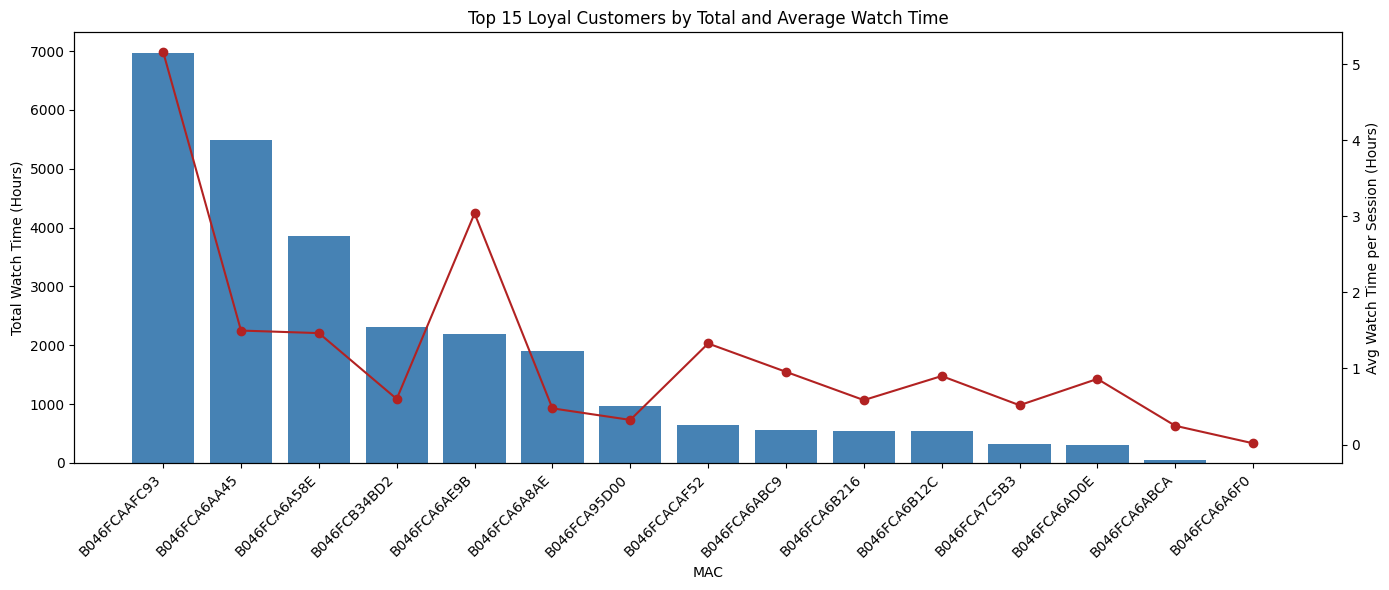

In [16]:
loyal_customers = usage_summary[usage_summary['NumOfAppPerMac']>1].sort_values(
                    by=['DaysRegistered', 'AverageViewingTime'], ascending = [False, False]).head(15)
loyal_customers = loyal_customers.sort_values( by='TotalPlayingTimeHour', ascending = False)

fig, axs = plt.subplots(figsize=(14,6))

axs.bar(loyal_customers['MAC'], loyal_customers['TotalPlayingTimeHour'], color='steelblue')
axs.set_ylabel('Total Watch Time (Hours)')
axs.set_xlabel('MAC')
plt.xticks(rotation=45, ha='right')

axs1 = axs.twinx()
axs1.plot(loyal_customers['MAC'], loyal_customers['AverageViewingTime'], marker='o', color='firebrick')
axs1.set_ylabel('Avg Watch Time per Session (Hours)')


plt.title('Top 15 Loyal Customers by Total and Average Watch Time')
plt.tight_layout()
plt.show()


### ***Predict***

In [17]:
# Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### *Data prep for regression analysis*

In [18]:
df = usage_summary.copy()
df = pd.merge(df, user_info, on='MAC', how='outer', indicator=True)

In [19]:
df.head()

,MAC,NumOfSession,NumOfAppPerMac,TotalPlayingTimeHour,AverageViewingTime,DaysRegistered,WatchFrequency,IPTV_use,VOD_use,IPTV_time,VOD_time,NumOfDays,_merge
0,001C55007967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1056,right_only
1,001C55007A16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923,right_only
2,001C55007A8F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049,right_only
3,001C55007B29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1056,right_only
4,001C55007BD7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1007,right_only


In [20]:
df.tail()

,MAC,NumOfSession,NumOfAppPerMac,TotalPlayingTimeHour,AverageViewingTime,DaysRegistered,WatchFrequency,IPTV_use,VOD_use,IPTV_time,VOD_time,NumOfDays,_merge
2687,B046FCB94F76,15.0,2.0,1096.967650,0.549033,0.0,0.00,1020.0,980.0,550.49,546.48,0,both
2688,B046FCB95113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,right_only
2689,B046FCB95304,12.0,2.0,23.187983,0.055740,3.0,7.73,397.0,19.0,20.90,2.29,3,both
2690,B046FCB97497,11.0,2.0,80.286581,0.427056,3.0,26.76,182.0,6.0,80.29,0.00,3,both
2691,B046FCB9756A,16.0,2.0,921.034517,0.805100,3.0,307.01,622.0,528.0,612.86,308.18,3,both


In [21]:
df['IsQuit'] = (df['_merge'] == 'right_only').astype(int) ## If user is not quit, 'IsQuit' return value 1, else return value 0
df = df.drop(columns=['_merge', 'DaysRegistered', 'WatchFrequency', 'NumOfSession',	'NumOfAppPerMac', 'TotalPlayingTimeHour'])
df = df.select_dtypes(include=['float','int'])
df = df.fillna(0)

### *Classification Analysis with KNN*

In [22]:
# Split the training and test set 8:2 (cause the observation is limited)
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['IsQuit'])
X_train = df_train.copy()
y_train = X_train.pop('IsQuit')

X_test = df_test.copy()
y_test = X_test.pop('IsQuit')

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2153, 6) (2153,)
(539, 6) (539,)


In [23]:
y_train.head()
y_test.head()

2383    1
2497    0
2232    0
1556    0
282     0
Name: IsQuit, dtype: int64

In [24]:
# Function to plot confusion matrix
def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=15, pad=20)
    plt.xlabel('Prediction', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    plt.show()
    
# Funtion to plot ROC curve
def disp_roc_curve(y_test,y_pred):
    fpr, tpr, _ = roc_curve(y_test,y_pred)
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Funtion to evaluation of classification models
def evaluate_model(y_test,y_pred):
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values:\n',arr[:10])
    print(f'Accuracy Scores: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'Precision: {precision_score(y_test, y_pred) * 100:.2f}%')
    print(f'Recall: {recall_score(y_test, y_pred) * 100:.2f}%')
    print(f'F1 Score: {f1_score(y_test, y_pred) * 100:.2f}%')
    fpr, tpr, _ = roc_curve(y_test,y_pred)
    print(f'Area under curve (AUC): {auc(fpr, tpr) * 100:.2f}%')
    print('Classification Report from sklearn:\n',classification_report(y_test, y_pred))
    print(f'Confusion Matrix\n',confusion_matrix(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    disp_roc_curve(y_test,y_pred)

In [25]:
# Normalize data to the range [0, 1] by MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

Printing predicted and actual values:
 [[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
Accuracy Scores: 85.71%
Precision: 72.35%
Recall: 97.95%
F1 Score: 83.22%
Area under curve (AUC): 88.36%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88       344
           1       0.72      0.98      0.83       195

    accuracy                           0.86       539
   macro avg       0.85      0.88      0.85       539
weighted avg       0.89      0.86      0.86       539

Confusion Matrix
 [[271  73]
 [  4 191]]


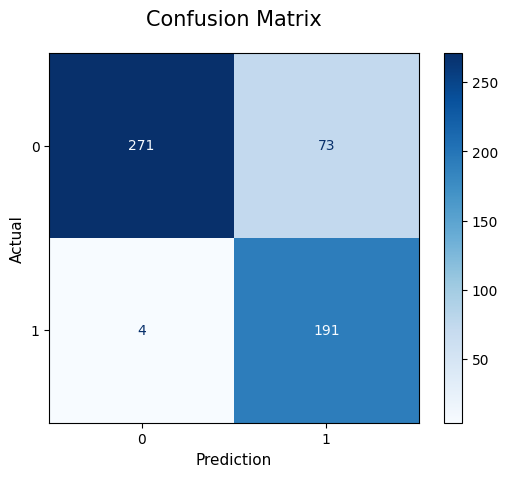

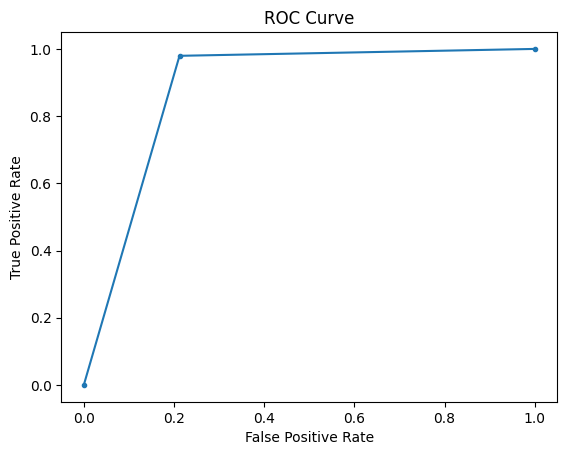

In [26]:
model = KNeighborsClassifier(n_neighbors = 1, p = 2)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Printing predicted and actual values:
 [[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
Accuracy Scores: 80.71%
Precision: 65.32%
Recall: 99.49%
F1 Score: 78.86%
Area under curve (AUC): 84.77%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82       344
           1       0.65      0.99      0.79       195

    accuracy                           0.81       539
   macro avg       0.82      0.85      0.81       539
weighted avg       0.87      0.81      0.81       539

Confusion Matrix
 [[241 103]
 [  1 194]]


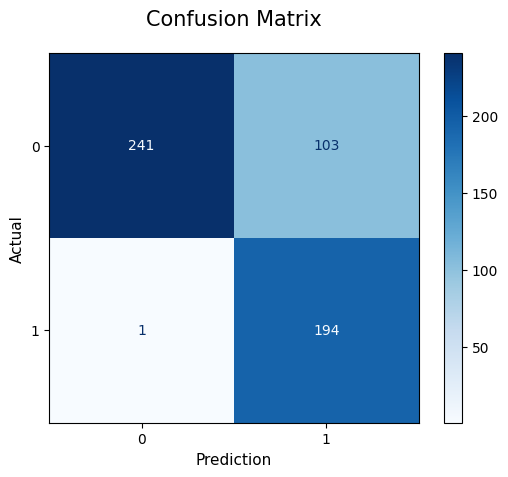

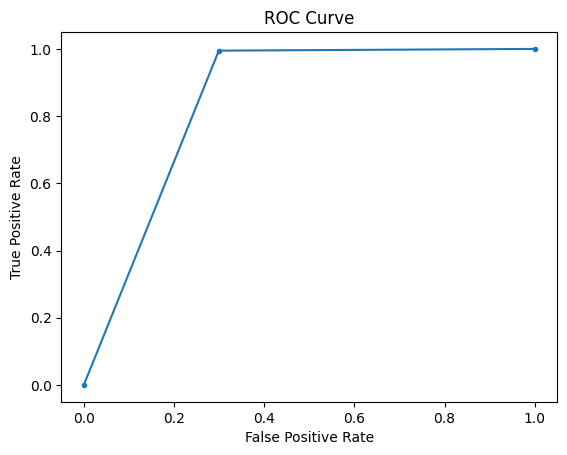

In [27]:
model = KNeighborsClassifier(n_neighbors = 5, p = 2)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

Printing predicted and actual values:
 [[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
Accuracy Scores: 80.89%
Precision: 65.65%
Recall: 98.97%
F1 Score: 78.94%
Area under curve (AUC): 84.81%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83       344
           1       0.66      0.99      0.79       195

    accuracy                           0.81       539
   macro avg       0.82      0.85      0.81       539
weighted avg       0.87      0.81      0.81       539

Confusion Matrix
 [[243 101]
 [  2 193]]


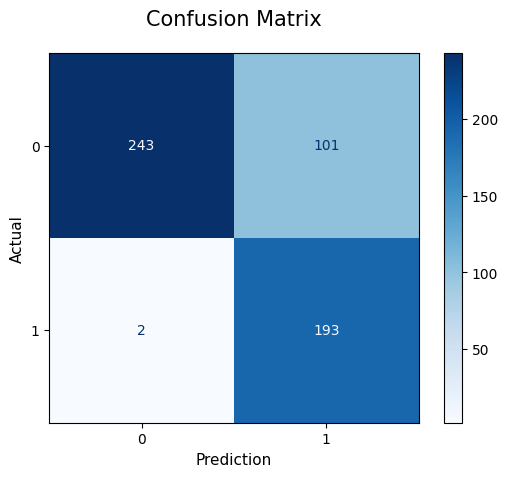

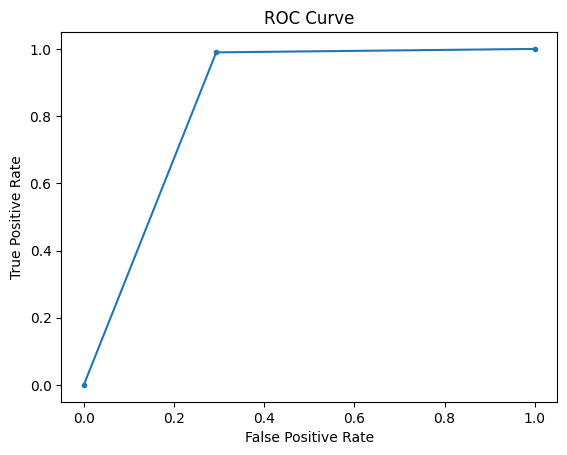

In [28]:
model = KNeighborsClassifier(n_neighbors = 5, p = 2, weights= 'distance')
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Printing predicted and actual values:
 [[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
Accuracy Scores: 79.96%
Precision: 64.36%
Recall: 100.00%
F1 Score: 78.31%
Area under curve (AUC): 84.30%
Classification Report from sklearn:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81       344
           1       0.64      1.00      0.78       195

    accuracy                           0.80       539
   macro avg       0.82      0.84      0.80       539
weighted avg       0.87      0.80      0.80       539

Confusion Matrix
 [[236 108]
 [  0 195]]


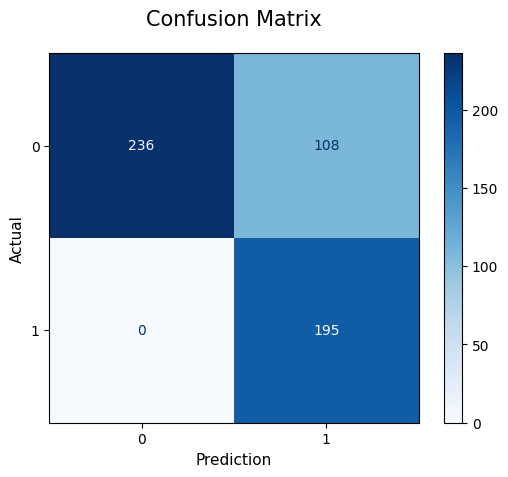

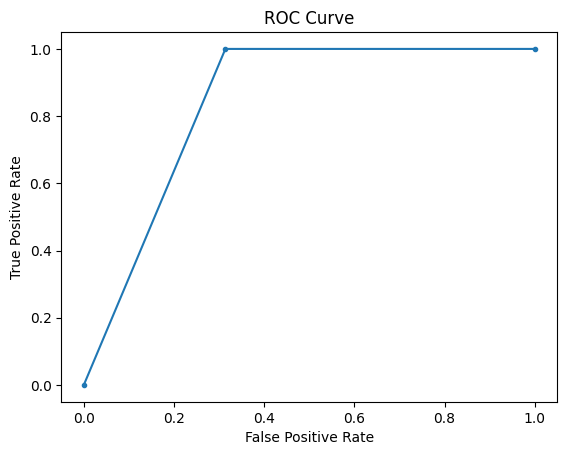

In [29]:
model = KNeighborsClassifier(n_neighbors = 5, p = 1, weights= 'distance')
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

*Conclusion: Based on the evaluation results, the KNN model with parameters {'n_neighbors': 1, 'weights': 'uniform', 'p': 2} is the best and most stable choice.*

*In contrast, the other models, although having high precision (~0.99), suffer from significantly lower recall (0.67–0.70). This means they miss many customers at risk of churning, making them less suitable for the problem’s objective*

### *Logistics Regression*